## In this project we would like to predict the number of calories in a product. We are getting the data from the government's database
https://data.gov.il/dataset/nutrition-database). 

In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
response=requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=c3cb0630-0650-46c1-a068-82d575c094b2&limit=4633")

### We will build our dataset 

In [3]:
identity=[]
protein=[]
name=[]
total_fat=[]
total_sugars=[]
vitamin_a=[]
vitamin_b12=[]
vitamin_b6=[]
vitamin_c=[]
vitamin_e=[]
vitamin_k=[]
calories=[]
carbons=[]

In [4]:
for data in response.json()['result']['records']:
    identity.append(data["_id"])
    protein.append(data["protein"])
    name.append(data["shmmitzrach"])
    total_fat.append(data["total_fat"])
    total_sugars.append(data["total_sugars"])
    vitamin_a.append(data["vitamin_a_iu"])
    vitamin_b12.append(data["vitamin_b12"])
    vitamin_b6.append(data["vitamin_b6"])
    vitamin_c.append(data["vitamin_c"])
    vitamin_e.append(data["vitamin_e"])
    vitamin_k.append(data["vitamin_k"])
    carbons.append(data["carbohydrates"])
    calories.append(data["food_energy"])

In [5]:
newDataFrame=pd.DataFrame({'name':name,'identity':identity,'protein':protein,'total_fat':total_fat,'total_sugars':total_sugars,
                          'vitamin_a':vitamin_a,'vitamin_b12':vitamin_b12,'vitamin_b6':vitamin_b6,'vitamin_c':vitamin_c,'vitamin_e':vitamin_e,
                          'vitamin_k':vitamin_k,'carbons':carbons,'calories':calories})
newDataFrame

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,carbons,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,5.1,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,15.3,112
2,חלב אם,3,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,6.9,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,4.6,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,4.6,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4628,"טופו במרקם רך, מועשר בסידן, משק ווילר",4629,14.4,7.4,0.0,140.9,0.00,0.02,0.2,NaN,NaN,1.7,130
4629,"טופו משי, ללא גלוטן, במרקם קשה, Silken firm",4630,6.9,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,2.3,62
4630,"טופו משי,קל, ללא גלוטן, במרקם קשה, Silken lite...",4631,6.3,0.8,0.5,0.0,0.00,0.00,0.0,NaN,NaN,1.1,37
4631,"טופו משי, ללא גלוטן, במרקם רך, Silken soft",4632,4.8,2.7,1.3,0.0,0.00,0.01,0.0,NaN,NaN,2.8,55


### After we have our dataset ready let's take a quick glance at our dataset

In [6]:
newDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4633 entries, 0 to 4632
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          4633 non-null   object 
 1   identity      4633 non-null   int64  
 2   protein       4633 non-null   float64
 3   total_fat     4633 non-null   float64
 4   total_sugars  4243 non-null   float64
 5   vitamin_a     2640 non-null   float64
 6   vitamin_b12   4219 non-null   float64
 7   vitamin_b6    4237 non-null   float64
 8   vitamin_c     4231 non-null   float64
 9   vitamin_e     3982 non-null   float64
 10  vitamin_k     3704 non-null   float64
 11  carbons       4629 non-null   float64
 12  calories      4633 non-null   int64  
dtypes: float64(10), int64(2), object(1)
memory usage: 470.7+ KB


In [7]:
newDataFrame.head()

,name,identity,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,carbons,calories
0,"מי גבינה, חומצי, נוזלי",1,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,5.1,24
1,"בורגול, מבושל עם שעועית לבנה ועגבניות",2,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,15.3,112
2,חלב אם,3,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,6.9,70
3,"חלב 3% שומן, תנובה, טרה, הרדוף, יטבתה",4,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,4.6,60
4,"חלב 1% שומן בקרטון מועשר ויטמין A,D, וסידן",5,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,4.6,42


### We will drop the "name" column as well as the "identity"  column because they are irrelevant to the prediction

In [8]:
DataFrame=newDataFrame.drop(['name','identity'],axis='columns')

In [9]:
DataFrame.head(5)

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,carbons,calories
0,0.8,0.1,5.1,7.0,0.18,0.04,0.1,0.0,0.00,5.1,24
1,5.3,1.7,1.0,0.9,0.00,0.10,4.2,0.4,4.47,15.3,112
2,1.0,4.4,6.9,NaN,0.05,0.01,5.0,0.1,0.30,6.9,70
3,3.3,3.0,4.6,149.5,0.45,0.04,0.0,0.1,0.28,4.6,60
4,3.0,1.0,4.6,202.1,0.43,0.03,0.0,0.0,0.10,4.6,42


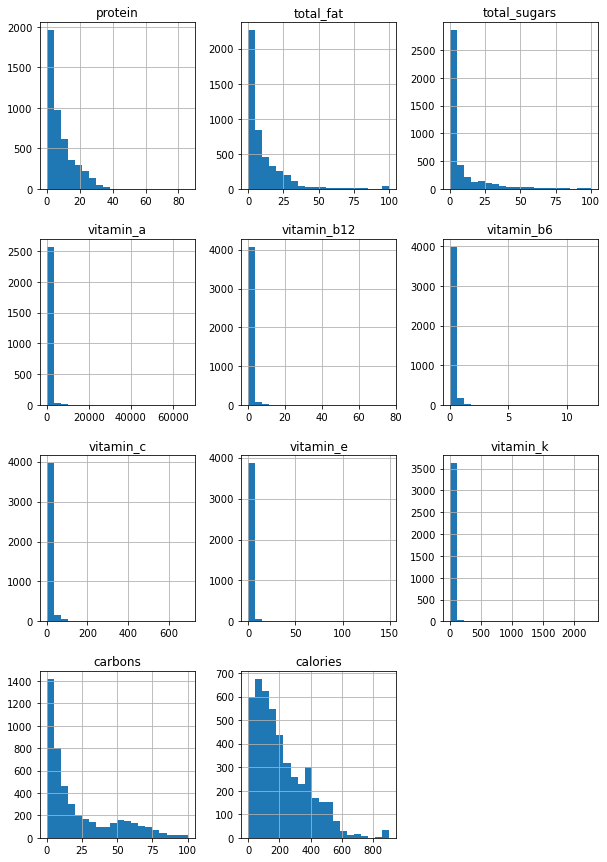

In [10]:
DataFrame.hist(bins=20, figsize=(10,15))
plt.show()

In [11]:
DataFrame.describe()

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,carbons,calories
count,4633.000000,4633.000000,4243.000000,2640.000000,4219.000000,4237.000000,4231.000000,3982.000000,3704.000000,4629.000000,4633.000000
mean,8.404446,10.040471,8.709922,469.589015,0.730574,0.197996,8.637060,1.353039,18.579341,21.855757,213.871358
std,8.822852,14.156297,15.292708,2736.777202,3.393107,0.374223,25.546128,3.880564,83.001037,24.151688,166.370414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.700000,1.000000,0.600000,0.000000,0.000000,0.050000,0.000000,0.200000,0.700000,3.900000,82.000000
50%,5.700000,5.000000,2.500000,16.800000,0.060000,0.110000,1.000000,0.600000,3.900000,10.700000,169.000000
75%,12.000000,13.900000,8.600000,155.350000,0.450000,0.230000,7.400000,1.300000,13.160000,34.200000,320.000000
max,85.600000,100.000000,99.800000,66989.000000,76.500000,12.000000,694.000000,149.400000,2262.800000,100.000000,902.000000


### As we can see there are a lot of null values in our dataset. But before we take care of that we need to split our dataset into training set and testing set :

We are going to leave the test set aside, and take a look at our train set:

In [12]:
train_set, test_set = train_test_split(DataFrame, test_size=0.2, random_state=42)

## Checking for correlations in our train set:

In [13]:
corr_matrix = train_set.corr()
corr_matrix["calories"].sort_values(ascending=False)

calories        1.000000
total_fat       0.810866
carbons         0.577795
vitamin_e       0.375924
total_sugars    0.369364
protein         0.213920
vitamin_b6      0.108598
vitamin_b12     0.031790
vitamin_a      -0.005059
vitamin_k      -0.023830
vitamin_c      -0.094557
Name: calories, dtype: float64

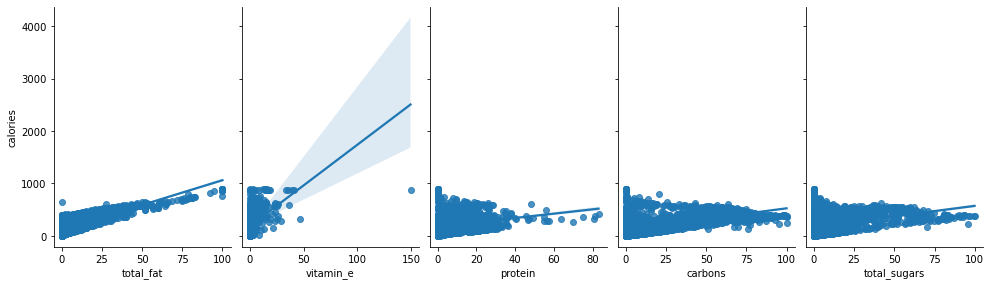

In [14]:
sns.pairplot(train_set,x_vars=['total_fat','vitamin_e','protein','carbons','total_sugars'], y_vars='calories', 
             height=4, aspect = 0.7, kind='reg',dropna=True)

array([[<AxesSubplot:xlabel='total_fat', ylabel='total_fat'>,
        <AxesSubplot:xlabel='vitamin_e', ylabel='total_fat'>,
        <AxesSubplot:xlabel='protein', ylabel='total_fat'>,
        <AxesSubplot:xlabel='carbons', ylabel='total_fat'>,
        <AxesSubplot:xlabel='total_sugars', ylabel='total_fat'>,
        <AxesSubplot:xlabel='calories', ylabel='total_fat'>],
       [<AxesSubplot:xlabel='total_fat', ylabel='vitamin_e'>,
        <AxesSubplot:xlabel='vitamin_e', ylabel='vitamin_e'>,
        <AxesSubplot:xlabel='protein', ylabel='vitamin_e'>,
        <AxesSubplot:xlabel='carbons', ylabel='vitamin_e'>,
        <AxesSubplot:xlabel='total_sugars', ylabel='vitamin_e'>,
        <AxesSubplot:xlabel='calories', ylabel='vitamin_e'>],
       [<AxesSubplot:xlabel='total_fat', ylabel='protein'>,
        <AxesSubplot:xlabel='vitamin_e', ylabel='protein'>,
        <AxesSubplot:xlabel='protein', ylabel='protein'>,
        <AxesSubplot:xlabel='carbons', ylabel='protein'>,
        <AxesSubplot:x

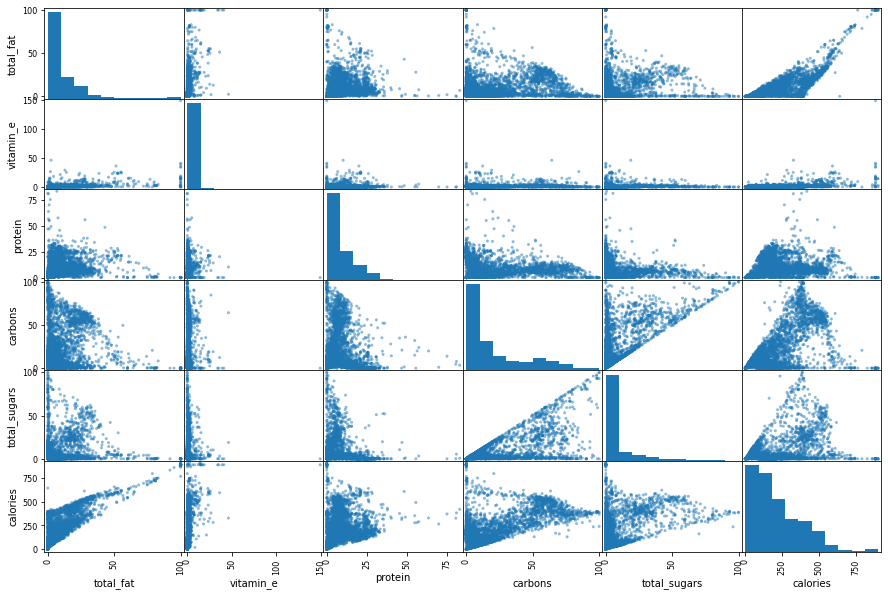

In [15]:
attributes = ['total_fat','vitamin_e','protein','carbons','total_sugars','calories']
scatter_matrix(train_set[attributes], figsize=(15, 10))

## From looking at our correlations, we can see a strong correlation between the total fat , the carbons  and  the protein to the calories:

### Total fat:

<AxesSubplot:xlabel='total_fat', ylabel='calories'>

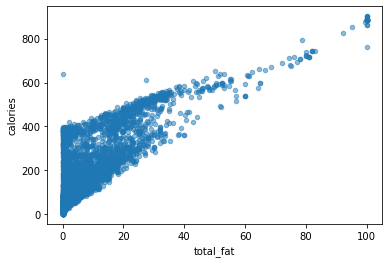

In [16]:
train_set.plot(kind="scatter", x="total_fat", y="calories",
 alpha=0.5)

### Carbons:

<AxesSubplot:xlabel='carbons', ylabel='calories'>

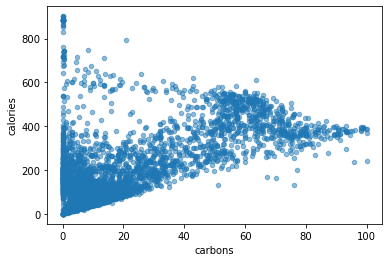

In [17]:
train_set.plot(kind="scatter", x="carbons", y="calories",
 alpha=0.5)

### Protein:

<AxesSubplot:xlabel='protein', ylabel='calories'>

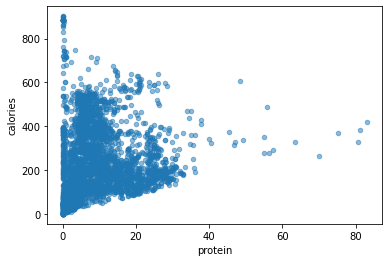

In [18]:
train_set.plot(kind="scatter", x="protein", y="calories",
 alpha=0.5)

## Now let's prepare the data for our learning algorithm:

### First we will check our training set:

<AxesSubplot:>

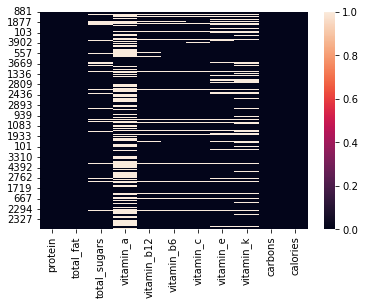

In [19]:
sns.heatmap(train_set.isnull())

### As we can see there are a lot of null values. So we will take care of that by filling the values with 0:

<AxesSubplot:>

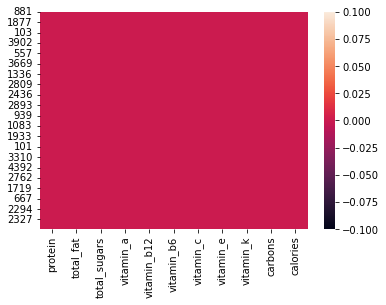

In [20]:
train_set=train_set.fillna(0)
sns.heatmap(train_set.isnull())

### We also know that the vitamins are measured in milligrams, so in order to convert them into grams we will divide the cells by 1000:

In [21]:
attributes=['vitamin_a','vitamin_b12','vitamin_b6','vitamin_c','vitamin_e','vitamin_k']
for i in attributes:
    train_set[i]=train_set[i]/1000

In [22]:
train_set.head()

,protein,total_fat,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,carbons,calories
881,18.9,0.9,0.0,0.0000,0.00142,0.00012,0.0000,0.0010,0.00000,0.0,88
1501,5.2,32.2,34.3,0.0000,0.00007,0.00012,0.0005,0.0003,0.00140,49.0,531
1204,8.3,1.7,1.1,0.0000,0.00000,0.00007,0.0000,0.0001,0.00084,53.6,264
2223,4.8,1.4,0.5,9.0011,0.00000,0.00028,0.0361,0.0001,0.00052,5.5,62
4018,1.5,1.4,3.1,0.0000,0.00000,0.00020,0.0211,0.0003,0.00587,2.8,31


# Our data is scaled and filled and it is ready for our learning algorithm:

### In order to predict a value, we  will need to use a regression algorithm. In this project we will use linear regression, decision tree and k-nearest neighbors

## First algorithm: linear regression

In [23]:
nutrition = train_set.drop("calories", axis=1)
nutrition_lables = train_set["calories"].copy()

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(nutrition,nutrition_lables)

LinearRegression()

## Prediction vs Reality

### Prediction:

In [25]:
predictions = lin_reg.predict(nutrition)

In [26]:
predictions

array([ 90.57140229, 500.66593793, 264.65450586, ..., 283.8898834 ,
       139.53490508, 120.03554617])

### Real:

In [27]:
np.array(nutrition_lables)

array([ 88, 531, 264, ..., 315, 140, 114])

In [28]:
scores = r2_score(nutrition_lables,predictions)
scores

0.9805314381726412

### We can see that the R^2 is 0.98 which is fairly high. Let's see if we can improve our model even more by using cross validation ParamGridCV

In [66]:
scores_arr = cross_val_score(lin_reg, nutrition,nutrition_lables,
scoring = "r2", cv=10)
scores_arr.mean()

0.980036196427076

In [30]:
param_grid = [
 {'fit_intercept': [True,False], 'normalize': [True,False],
 'copy_X': [True,False], 'n_jobs':[0,5,10,100,1000]},
 ]
new_lin_reg=LinearRegression()
grid_search=GridSearchCV(new_lin_reg,param_grid,cv=10,scoring='r2',return_train_score=True)
grid_search.fit(nutrition,nutrition_lables)

GridSearchCV(cv=10, estimator=LinearRegression(),
             param_grid=[{'copy_X': [True, False],
                          'fit_intercept': [True, False],
                          'n_jobs': [0, 5, 10, 100, 1000],
                          'normalize': [True, False]}],
             return_train_score=True, scoring='r2')

In [31]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': False}

In [32]:
grid_search.best_estimator_

LinearRegression(n_jobs=0)

In [33]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9800361964270758 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}
0.980036196427076 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': False}
0.9800361964270758 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'normalize': True}
0.980036196427076 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'normalize': False}
0.9800361964270758 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': True}
0.980036196427076 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': False}
0.9800361964270758 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 100, 'normalize': True}
0.980036196427076 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 100, 'normalize': False}
0.9800361964270758 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1000, 'normalize': True}
0.980036196427076 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1000, 'normalize': False}
0.9795026678001675 {'copy_X': True, 'fit_intercept': False, 'n_jobs': 0, 'norm

In [67]:
best_lin_reg = grid_search.best_estimator_

## Second algorithm: Decision Tree Regressor

In [35]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(nutrition,nutrition_lables)

DecisionTreeRegressor()

## Prediction vs Reality

### Prediction

In [70]:
predictions=tree_reg.predict(nutrition)

In [37]:
predictions

array([ 88., 531., 264., ..., 315., 140., 114.])

### real

In [38]:
np.array(nutrition_lables)

array([ 88, 531, 264, ..., 315, 140, 114])

In [39]:
scores = r2_score(nutrition_lables,predictions)
scores

0.9966387927360624

### Using Cross - Validation on the decision tree algorithm:

In [40]:
scores_arr = cross_val_score(tree_reg, nutrition,nutrition_lables,
 scoring="r2", cv=10)
scores_arr.mean()

0.966364808856872

### Fine tuning our model again using grid search:


In [41]:
param_grid = [
 {'splitter': ['best','random'],'min_samples_split': [2,3,4,5],
 'min_samples_leaf': [1,2,3,4,5],'max_features':[1,2,3,4,5,6,7,8,9]},
 ]
new_tree_reg=DecisionTreeRegressor()
grid_search=GridSearchCV(new_tree_reg,param_grid,cv=5,scoring='r2',return_train_score=True)
grid_search.fit(nutrition,nutrition_lables)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_leaf': [1, 2, 3, 4, 5],
                          'min_samples_split': [2, 3, 4, 5],
                          'splitter': ['best', 'random']}],
             return_train_score=True, scoring='r2')

In [42]:
grid_search.best_params_

{'max_features': 9,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

In [43]:
grid_search.best_score_

0.9695120271955975

In [69]:
best_dTree = grid_search.best_estimator_

## Third algorithm: knn regressor

In [45]:
knn = KNeighborsRegressor()
knn.fit(nutrition,nutrition_lables)

KNeighborsRegressor()

## Prediction vs Reality

### Prediction

In [46]:
predictions = knn.predict(nutrition)
predictions

array([ 89. , 518.8, 269.8, ..., 311. , 136.2, 112.6])

### Real

In [47]:
np.array(nutrition_lables)

array([ 88, 531, 264, ..., 315, 140, 114])

In [72]:
scores = r2_score(nutrition_lables,predictions)
scores

0.9966387927360624

### Using Cross - Validation on the knn algorithm: (didn't do)

In [71]:
scores_arr = cross_val_score(knn, nutrition,nutrition_lables,
 scoring = "r2", cv = 10)
scores_arr.mean()

0.9765195281124986

### Fine tuning our model again using grid search:



In [48]:
param_grid = [
 {'n_neighbors': [5,6,7,8,9,10,11,12,13,14,15,17,17,18,19,20],'weights':['uniform','distance'],'p':[1]},
 ]
new_knn=KNeighborsRegressor()
grid_search=GridSearchCV(new_knn,param_grid,cv=10,scoring='r2',return_train_score=True)
grid_search.fit(nutrition,nutrition_lables)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          17, 17, 18, 19, 20],
                          'p': [1], 'weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='r2')

In [49]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.9757371993960062 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.9785879884645572 {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.9758457334170586 {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}
0.9788053330427691 {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}
0.9758378885018452 {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
0.978485869250125 {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.9766412167547278 {'n_neighbors': 8, 'p': 1, 'weights': 'uniform'}
0.9789132186224654 {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
0.975854374001706 {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
0.9785022128816558 {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.9754037248622399 {'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.9784364606689122 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.9758033500860541 {'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
0.978468336130476 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}
0.9754643356791837 {'n_neighbors': 12, '

In [50]:
grid_search.best_score_

0.9789132186224654

In [51]:
grid_search.best_params_

{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

In [52]:
best_knn = grid_search.best_estimator_

## Choosing the final model - the Linear Regression

In [73]:
final_model = best_lin_reg

### Fixing the null values in the test set and scale the values

<AxesSubplot:>

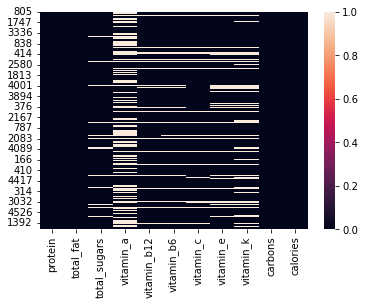

In [54]:
sns.heatmap(test_set.isnull())

In [55]:
test_set = test_set.fillna(0)

<AxesSubplot:>

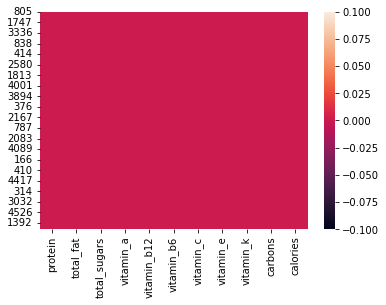

In [56]:
sns.heatmap(test_set.isnull())

In [57]:
attributes=['vitamin_a','vitamin_b12','vitamin_b6','vitamin_c','vitamin_e','vitamin_k']
for i in attributes:
    test_set[i]=test_set[i]/1000

In [58]:
X_test = test_set.drop("calories", axis=1)
y_test = test_set["calories"].copy()
final_predictions = final_model.predict(X_test)
final_r2=r2_score(y_test,final_predictions)
final_r2

0.9889675424955724

# Comparing our model with a dummy model:

####  (*) Let's say that this model will always "predict" the most frequent value of calories

### Lets check the score of the model:

In [59]:
from sklearn.dummy import DummyClassifier

In [60]:
dummy_clf=DummyClassifier(strategy="most_frequent")

In [61]:
dummy_clf.fit(nutrition,nutrition_lables)
predicts=dummy_clf.predict(nutrition)

In [62]:
r2_score(nutrition_lables,predicts)

-0.7572508133134106

#### The dummy model does not follow the trend of the data, therefore our model is better than this model

### 

### The model we built has a high accuracy rate but as we saw there is a strong correlation between the carbons, the total fats and the protein to the calories. Therefore, we will remove those columns from the dataset, and try to run the model again.

In [63]:
train_df=train_set.drop(['protein','total_fat','carbons'],axis=1)
train_df

,total_sugars,vitamin_a,vitamin_b12,vitamin_b6,vitamin_c,vitamin_e,vitamin_k,calories
881,0.0,0.0000,0.00142,0.00012,0.0000,0.0010,0.00000,88
1501,34.3,0.0000,0.00007,0.00012,0.0005,0.0003,0.00140,531
1204,1.1,0.0000,0.00000,0.00007,0.0000,0.0001,0.00084,264
2223,0.5,9.0011,0.00000,0.00028,0.0361,0.0001,0.00052,62
4018,3.1,0.0000,0.00000,0.00020,0.0211,0.0003,0.00587,31
...,...,...,...,...,...,...,...,...
4426,0.0,0.1780,0.00036,0.00002,0.0023,0.0000,0.00000,97
466,0.0,0.0000,0.00304,0.00048,0.0000,0.0008,0.00150,190
3092,5.5,0.0000,0.00000,0.00036,0.0000,0.0000,0.00000,315
3772,1.0,0.0055,0.00041,0.00055,0.0012,0.0008,0.00306,140


In [64]:
X=train_df.drop('calories',axis=1)
y=train_df['calories'].copy()

In [65]:
new_lin_reg=LinearRegression()
param_grid = [
 {'fit_intercept': [True,False], 'normalize': [True,False],
 'copy_X': [True,False], 'n_jobs':[0,5,10,100,1000]},
 ]
grid_search=GridSearchCV(new_lin_reg,param_grid,cv=10,scoring='r2',return_train_score=True)
grid_search.fit(X,y)
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_score, params)

0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': False}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'normalize': True}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 5, 'normalize': False}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': True}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 10, 'normalize': False}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 100, 'normalize': True}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 100, 'normalize': False}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1000, 'normalize': True}
0.19451494105543093 {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1000, 'normalize': False}
-0.4399476255204881 {'copy_X': True, 'fit_intercept': False, 'n

In [74]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 0, 'normalize': True}

In [75]:
new_best_lin_reg = grid_search.best_estimator_

### To conclude, we can see that the accuracy rate of the model is low. Probably because there is a weak correlation between the vitamins and the calories (shocker).

#### Thank you :)